# **Cell 1 — Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


# **Cell 2 — Create Dataset (User Input)**

In [ ]:
t = int(input("How many types of houses are you looking for? "))
if t < 1:
    t = 1  # minimum 1 house

Area, BHK, Bathrooms, Age, Price = [], [], [], [], []

for i in range(t):
    print(f"\nEnter details for house type {i+1}:")
    area = float(input("Area (sq ft): "))
    bhk = int(input("BHK: "))
    bath = int(input("Bathrooms: "))
    age = int(input("Age of House: "))

    price = (area * 150) + (bhk * 10000) + (bath * 5000) - (age * 1000)

    Area.append(area)
    BHK.append(bhk)
    Bathrooms.append(bath)
    Age.append(age)
    Price.append(price)

df = pd.DataFrame({
    'Area': Area,
    'BHK': BHK,
    'Bathrooms': Bathrooms,
    'Age': Age,
    'Price': Price
})

print("\n--- Dataset ---")
print(df)


How many types of houses are you looking for? 3

Enter details for house type 1:
Area (sq ft): 1200
BHK: 2
Bathrooms: 2
Age of House: 2

Enter details for house type 2:
Area (sq ft): 1300
BHK: 2
Bathrooms: 1
Age of House: 12

Enter details for house type 3:
Area (sq ft): 1500
BHK: 3
Bathrooms: 2
Age of House: 12

--- Dataset ---
     Area  BHK  Bathrooms  Age     Price
0  1200.0    2          2    2  208000.0
1  1300.0    2          1   12  208000.0
2  1500.0    3          2   12  253000.0


# **Cell 3 — Visualize Features**

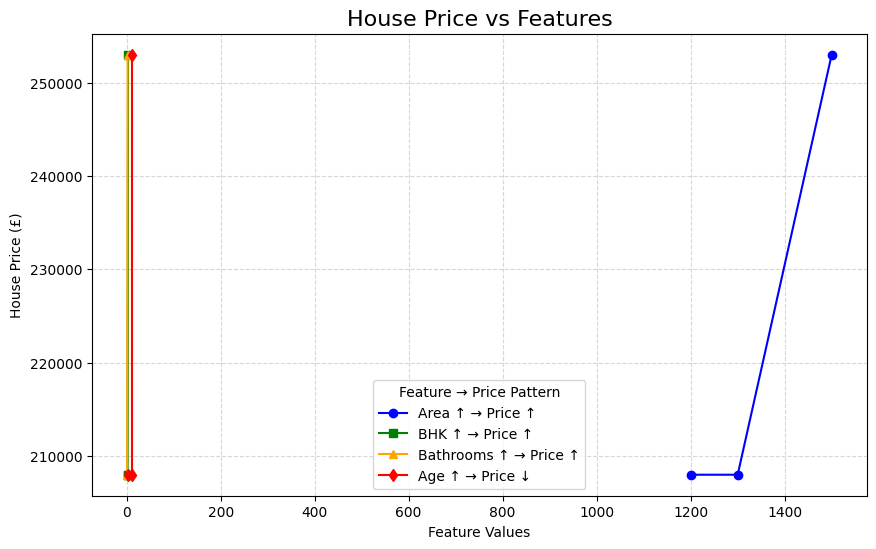

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(df['Area'], df['Price'], color='blue', marker='o', linestyle='-', label="Area ↑ → Price ↑")
plt.plot(df['BHK'], df['Price'], color='green', marker='s', linestyle='-', label="BHK ↑ → Price ↑")
plt.plot(df['Bathrooms'], df['Price'], color='orange', marker='^', linestyle='-', label="Bathrooms ↑ → Price ↑")
plt.plot(df['Age'], df['Price'], color='red', marker='d', linestyle='-', label="Age ↑ → Price ↓")

plt.title("House Price vs Features", fontsize=16)
plt.xlabel("Feature Values")
plt.ylabel("House Price (£)")
plt.legend(title="Feature → Price Pattern")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



# **Cell 4 — Prepare Data & Train Model**

In [ ]:
X = df[['Area', 'BHK', 'Bathrooms', 'Age']]
y = df['Price']

if len(df) < 2:
    print("\nNot enough data to split. Using the single row for training/testing.")
    X_train, X_test, y_train, y_test = X, X, y, y
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

y_pred = model.predict(X_test)
print("\nMean Absolute Error:", mean_absolute_error(y_test, y_pred))
if len(y_test) < 2:
    print("R² Score is undefined with less than 2 samples.")
else:
    print("R² Score:", r2_score(y_test, y_pred))


Model trained successfully!
Coefficients: [224.98875056   1.12494375   1.12494375   0.        ]
Intercept: -84488.75056247186

Mean Absolute Error: 22497.750112494396
R² Score is undefined with less than 2 samples.


# **Cell 5 — User Price Prediction (Demo)**

In [ ]:
print("\nEnter new house details to predict price:\n")

user_area = float(input("Enter Area (sq ft): "))
user_bhk = int(input("Enter BHK: "))
user_bath = int(input("Enter Bathrooms: "))
user_age = int(input("Enter Age of house: "))

new_data = pd.DataFrame({
    'Area': [user_area],
    'BHK': [user_bhk],
    'Bathrooms': [user_bath],
    'Age': [user_age]
})

pred_price = model.predict(new_data)[0]
print("\nPredicted House Price = £", round(pred_price, 2))



Enter new house details to predict price:

Enter Area (sq ft): 1500
Enter BHK: 4
Enter Bathrooms: 2
Enter Age of house: 1

Predicted House Price = £ 253001.12
